# Introduction to BlenderProc

Note: This notebook makes use of the basic example which is available under `examples/basic`

In this notebook, we will see how can we quickly set up the BlenderProc environment inside Google Colab and how can we generate photorealistic data which can later be used for many different applications.

We firstly clone the official BlenderProc repo (repository) from GitHub using Git

In [1]:
!git clone https://github.com/DLR-RM/BlenderProc.git
%cd "BlenderProc"

Cloning into 'BlenderProc'...
remote: Enumerating objects: 39125, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 39125 (delta 3), reused 5 (delta 1), pack-reused 39107
Receiving objects: 100% (39125/39125), 86.37 MiB | 15.91 MiB/s, done.
Resolving deltas: 100% (29442/29442), done.
/content/BlenderProc


To be able to use the blenderproc command, we install it via pip:

In [2]:
!pip install -e .

Obtaining file:///content/BlenderProc
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=aecda2d7819cee744a7613fc8bb5c0024e981a7a6b4f4f1d0bbbe07016fa188a
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
  Running setup.py develop for blenderproc


In order to run BlenderProc inside Google Colab, we first have to update the `LD_PRELOAD` environment variable

In [3]:
import os

# updating the LD_PRELOAD env variable
os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0"

To be able to use matplotlib inside BlenderProc, we have to install ipykernel inside blender's python environment. As this is the first blenderproc command, it will also install blender first:

In [4]:
!blenderproc pip install ipykernel --blender-install-path ./

100% ||
Using blender in ./blender-3.1.0-linux-x64
Looking in links: /tmp/tmpty2amnkm
Processing /tmp/tmpty2amnkm/setuptools-58.1.0-py3-none-any.whl
Processing /tmp/tmpty2amnkm/pip-21.2.4-py3-none-any.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blenderproc 2.3.0 requires h5py, which is not installed.
blenderproc 2.3.0 requires matplotlib, which is not installed.
blenderproc 2.3.0 requires numpy, which is not installed.
blenderproc 2.3.0 requires Pillow, which is not installed.
blenderproc 2.3.0 requires progressbar, which is not installed.
blenderproc 2.3.0 requires pyyaml, which is not installed.
blenderproc 2.3.0 requires requests, which is not installed.
     |████████████████████████████████| 2.1 MB 5.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4

Finally, we run the BlenderProc program using the `blenderproc run`  along with required command line arguments. The first argument specifies the location of the python file that should be executed. The second argument corresponds to the camera pose file. In this case, we have specified two camera poses in the `examples/basics/basic/camera_positions` file. The third argument correponds to the output directory where our generated data will be stored. 

With the flag `--blender-install-path`, we specify the custom Blender install path which is necessary, as no user folder is availabe in colab.

In [5]:
# run the BlenderProc basic example
!blenderproc run examples/basics/basic/main.py examples/resources/camera_positions examples/resources/scene.obj examples/basics/basic/output --blender-install-path ./

Using blender in ./blender-3.1.0-linux-x64
Using temporary directory: /dev/shm/blender_proc_d9c99850fccd4592b665c791fb5704ff
Blender 3.1.0 (hash c77597cd0e15 built 2022-03-09 00:34:48)
Installing pip package wheel None
Installing pip package wheel None
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Installing pip package pyyaml 5.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.0/265.0 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp310-cp310-linux_x86_64.whl size=44116 sha256=40dcab5ffae2418574c809da1f2b672c8d7e90598695980d42616ac8eae67908
  Stored in directory: /root/.cache/pip/wheels/1c/77/3e/dcf9cc5e235189dedcf5f1736a14caaac20267a5bb846c8ce1
Successfully built pyyaml
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ble

We visualize the first rendered color, depth and normal image which corresponds to the `0.hdf5` file inside the `examples/basics/basic/output` folder

examples/basics/basic/output/0.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


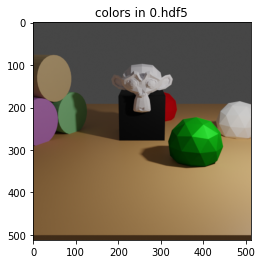

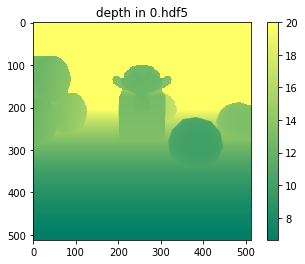

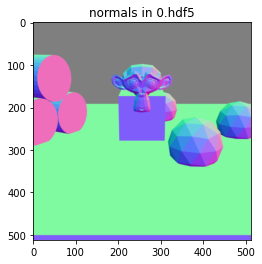

In [7]:
# visualize the generated data (0.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/basic/output/0.hdf5"

We visualize the second rendered color, depth and normal image which corresponds to the `1.hdf5` file inside the `examples/basics/basic/output` folder

examples/basics/basic/output/1.hdf5: 
Keys: 'colors': (512, 512, 3), 'depth': (512, 512), 'normals': (512, 512, 3)


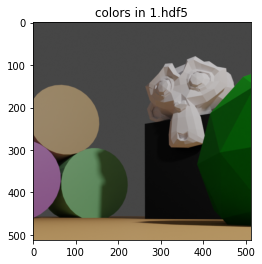

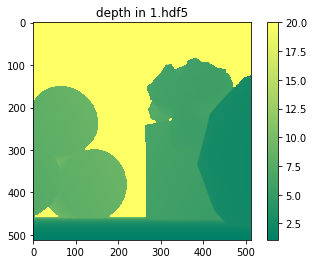

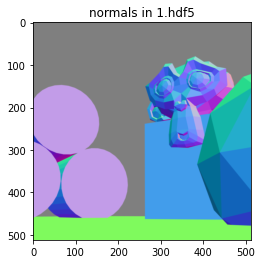

In [8]:
# visualize the generated data (1.hdf5)
%run "-m" "blenderproc" "vis" "hdf5" "examples/basics/basic/output/1.hdf5"